In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./../")

In [3]:
import os

from pathlib import Path
import pprint
import hashlib
import pickle
import time

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as T
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from dotted_dict import DottedDict

In [4]:
p_root='/mnt/data/datasets/multimnist_test'
p_root=Path(p_root)

In [5]:

def mkdir_directories(dirs, parents, exist_ok):
    for director in dirs:
        Path(director).mkdir(parents=parents, exist_ok=exist_ok)

In [6]:
    def __pad_rand__():
        ref = 8
        left = np.random.randint(1, high=9, size=None, dtype=int)
        rigth = ref - left
        up = np.random.randint(1, high=9, size=None, dtype=int)
        down = ref - up
        
        return [left, up, rigth, down]

In [7]:
#mnist
ds_train = datasets.MNIST(root=p_root, train=True, download=True, transform=T.ToTensor())
ds_valid = datasets.MNIST(root=p_root, train=False, download=True, transform=T.ToTensor())

In [8]:
#paths
p_data = p_root / "Train"
p_imgs = p_data / 'Img'

In [9]:
images=ds_train.data.unsqueeze(1)
labels=ds_train.targets
n = 10

.unsqueeze(1) -> before loop
label1 = labels[j].item() -> give label item insted of tensor


In [10]:


mkdir_directories([p_data, p_imgs], parents=True, exist_ok=True)

Start = time.time()


#lists
all_targets1 = []
all_targets2 = []

#generator index
index = 1


StartLoop = time.time()
#test dataset
test = images[0:6]
print(test.size())
for j, image in enumerate(test):

#generate for whole dataset
#for j, image in enumerate(images):

    #reference img
    img_ref = images[j]
    lab_ref = labels[j]

    #choose random top images from different classes
    top_idx = np.where(labels != lab_ref)[0]
    top_idx = np.random.choice(top_idx,n,replace=False)

    #generate images
    for i, idx in enumerate(top_idx):
        
        #randomize position
        base  = T.Pad(padding=__pad_rand__())(images[j])
        top   = T.Pad(padding=__pad_rand__())(images[top_idx[i]])
        
        #merge images
        merge = torch.clamp(base + top,min=0, max=1)
        #merge_s = merge.unsqueeze(0)

        
        #add labels to list
        label1 = labels[j].item()
        label2 = labels[top_idx[i]].item()
        all_targets1.append(label1)
        all_targets2.append(label2)

        #Save Img as png
        #a = plt.imshow(merge.float().permute(1,2,0))
        #a.savefig(p_imgs / "{:08d}.png".format(index))
        #a.close()

        #img = Image.fromarray(merge.float().numpy(), mode='L')
        #img.save( p_imgs / "{:08d}.png".format(index))
        torchvision.utils.save_image(merge.float(), p_imgs / "{:08d}.png".format(index))
        index += 1 

EndLoop = time.time()
print(sys.getsizeof(all_targets1))
print(len(all_targets1))
print(sys.getsizeof(all_targets2))
print(len(all_targets2))


#create target 1
file_targets1 = open(p_data /'targets_1.plk', 'wb')
pickle.dump(all_targets1, file_targets1)
file_targets1.close()

#create target 2
file_targets2 = open(p_data /'targets_2.plk', 'wb')
pickle.dump(all_targets2, file_targets2)
file_targets2.close()

End = time.time()

print("Done")

torch.Size([6, 1, 28, 28])
568
60
568
60
Done


In [11]:
a = 113 / 60000
b = a * 60000000
b / (60 * 60 * 24)



1.3078703703703705

In [12]:
all_targets1[0]


5

In [13]:
t_all = End - Start
t_loop = EndLoop - StartLoop
print(t_all)
print(t_loop)
print(t_all-t_loop)

0.06205916404724121
0.06116819381713867
0.0008909702301025391


1.5270397663116455
1.5180883407592773
1.39308500289917
12.76402497291565

In [16]:
img =ds_train.data[0]

img.shape

img = Image.fromarray(img.numpy(), mode='L')

img

In [17]:
ds_train.data.shape

ds = ds_train.data.unsqueeze(1).float()
ds.shape


torch.Size([60000, 1, 28, 28])

In [18]:
def loadtrageds():
    #load target files
    file = open(p_root / 'Train/targets_1.plk', 'rb')
    targets_1 = pickle.load(file)
    file.close()

    file = open(p_root / 'Train/targets_2.plk', 'rb')
    targets_2 = pickle.load(file)
    file.close()  

    #for i, target in enumerate(targets_1):
    # 	print(i+1, targets_1[i], targets_2[i])
    return targets_1, targets_2 

In [19]:
t1, t2 = loadtrageds()
len(t1)


60

In [20]:
t1[30]

1

Split in preparing and gerneration

In [21]:
    def __pad_rand_l__(m=1,n=1):
        ref = 8
        left = np.random.randint(1, high=9, size=(m*n), dtype=int)
        rigth = ref - left
        up = np.random.randint(1, high=9, size=(m*n), dtype=int)
        down = ref - up

        l_stack = np.stack((left,up, rigth, down), axis=1).tolist()
        
        return l_stack

In [22]:
a = __pad_rand_l__(60,10)


print(len(a))


base  = T.Pad(padding=a[0])(images[0])

600


In [23]:
images=ds_train.data
labels=ds_train.targets
n = 3

In [24]:
images=ds_train.data
labels=ds_train.targets
n = 2

Start = time.time()
# add 1 dim to mnist
images = images.unsqueeze(1)

# proof path
mkdir_directories([p_data, p_imgs], parents=True, exist_ok=True)

#generate index list for mmnist
all_ref = []
all_top = []

test = labels[0:2]
print(test.size())

StartLoop = time.time()
for j, label in enumerate(test):

    top_idx = np.where(labels != label)[0]
    list_top = np.random.choice(top_idx,n,replace=False).tolist()
    list_ref = np.full(n,j).tolist()

    all_ref.extend(list_ref)
    all_top.extend(list_top)

EndLoop = time.time()

StartPickle = time.time()
#save labels
#create target 1
targets1 = labels[all_ref].tolist()
file_targets1 = open(p_data /'targets_1.plk', 'wb')
pickle.dump(targets1, file_targets1)
file_targets1.close()

#create target 2
targets2 = labels[all_top].tolist()
file_targets2 = open(p_data /'targets_2.plk', 'wb')
pickle.dump(targets2, file_targets2)
file_targets2.close()

EndPickle = time.time()

StartPattern = time.time()
#create rand pattern pos
pattern1 = __pad_rand_l__(len(test),n)
pattern2 = __pad_rand_l__(len(test),n)

EndPattern = time.time()

StartImgGen = time.time()
all_merge = []
all_file = []
#generate images
for i, ref in enumerate(all_ref):
    base  = T.Pad(padding=pattern1[i])(images[all_ref[i]])
    top   = T.Pad(padding=pattern2[i])(images[all_top[i]])

    merge = torch.clamp(base + top,min=0, max=1)
    all_merge.append(merge.float())
    all_file.append(p_imgs / "{:08d}.png".format((i+1)))
    #torchvision.utils.save_image(merge.float(), p_imgs / "{:08d}.png".format((i+1)))


EndImgGen = time.time()
End = time.time()
print(EndLoop - StartLoop)
print(EndPickle - StartPickle)
print(EndPattern - StartPattern)
print(EndImgGen - StartImgGen)
print(End-Start)  

#gen idx lists

torch.Size([2])
0.0067005157470703125
0.00069427490234375
0.00022912025451660156
0.0011038780212402344
0.00949239730834961


In [25]:
t1, t2 = loadtrageds()
len(t1)

4

In [26]:

#Image.fromarray(images[all_top[3]].squeeze(0).numpy(), mode='L')

print(len(all_merge))
print(all_merge[0].type())
print(all_file)

#torchvision.utils.save_image(all_merge, all_file)

4
torch.FloatTensor
[PosixPath('/mnt/data/datasets/multimnist_test/Train/Img/00000001.png'), PosixPath('/mnt/data/datasets/multimnist_test/Train/Img/00000002.png'), PosixPath('/mnt/data/datasets/multimnist_test/Train/Img/00000003.png'), PosixPath('/mnt/data/datasets/multimnist_test/Train/Img/00000004.png')]


In [27]:
print(type(all_ref))
print(len(all_ref))
print(all_top)


print(labels[all_ref].tolist())
print(targets1)
print(labels[all_top].tolist())
print(targets2)



<class 'list'>
4
[22588, 11553, 7909, 21717]
[5, 5, 0, 0]
[5, 5, 0, 0]
[7, 7, 8, 3]
[7, 7, 8, 3]


In [28]:
all_ref.extend(list_ref)

len(all_ref)

6

In [29]:
60000 / 111.27461862564087

#126 * 1000 / (3600)


60000000 / 539 /(60*60)

30.921459492888065

In [54]:
images=ds_train.data
labels=ds_train.targets
n = 1000

Start = time.time()
# add 1 dim to mnist
images = images.unsqueeze(1)

# proof path
mkdir_directories([p_data, p_imgs], parents=True, exist_ok=True)

#generate index list for mmnist
all_ref = []
all_top = []

#generate top label idx for each class
all_label = np.unique(labels)
top_idx = []

for k in all_label:
    top_idx.append(np.where(labels != k)[0])

test = labels[0:6000]
print(test.size())

StartLoop = time.time()
for j, label in enumerate(labels):
    #print(label)
    #top_idx = np.where(labels != label)[0]
    list_top = np.random.choice(top_idx[label.item()],n,replace=False).tolist()
    list_ref = np.full(n,j).tolist()

    all_ref.extend(list_ref)
    all_top.extend(list_top)

EndLoop = time.time()

StartPickle = time.time()

#create target 1 id's
file_targets1 = open(p_data /'targets_1_id.plk', 'wb')
pickle.dump(all_ref, file_targets1)
file_targets1.close()

#create target 2
file_targets2 = open(p_data /'targets_2_id.plk', 'wb')
pickle.dump(all_top, file_targets2)
file_targets2.close()

EndPickle = time.time()

StartPattern = time.time()
#create rand pattern pos
pattern1 = __pad_rand_l__(len(test),n)
pattern2 = __pad_rand_l__(len(test),n)

#create pattern 1 
file_targets1 = open(p_data /'pattern_1.plk', 'wb')
pickle.dump(pattern1, file_targets1)
file_targets1.close()

#create pattern 2 
file_targets1 = open(p_data /'pattern_2.plk', 'wb')
pickle.dump(pattern2, file_targets1)
file_targets1.close()




EndPattern = time.time()


End = time.time()
print(EndLoop - StartLoop)
print(EndPickle - StartPickle)
print(EndPattern - StartPattern)
print(End-Start)  

torch.Size([6000])
43.64641499519348
16.6497802734375
18.511000394821167
78.83201551437378


In [48]:
def load_meta():
    #load meta profil for mmnist
    file = open(p_root / 'Train/targets_1_id.plk', 'rb')
    id_1 = pickle.load(file)
    file.close()

    file = open(p_root / 'Train/targets_2_id.plk', 'rb')
    id_2 = pickle.load(file)
    file.close()  

    file = open(p_root / 'Train/pattern_1.plk', 'rb')
    pattern_1 = pickle.load(file)
    file.close()

    file = open(p_root / 'Train/pattern_2.plk', 'rb')
    pattern_2 = pickle.load(file)
    file.close()


    return id_1, id_2, pattern_1, pattern_2 

In [55]:
id1,id2,p1,p2 = load_meta()

len(id1)

#id1[0]

#print(id1)
#print(id2)
#print(p1)
#print(p2)

60000000

In [33]:
100/60

1.6666666666666667

In [46]:
all_label = np.unique(labels)
top_idx = []
for k in all_label:
    top_idx.append(np.where(labels != k)[0])

for h, hh in enumerate(top_idx):
    print(np.unique(labels[top_idx[h]]))

[1 2 3 4 5 6 7 8 9]
[0 2 3 4 5 6 7 8 9]
[0 1 3 4 5 6 7 8 9]
[0 1 2 4 5 6 7 8 9]
[0 1 2 3 5 6 7 8 9]
[0 1 2 3 4 6 7 8 9]
[0 1 2 3 4 5 7 8 9]
[0 1 2 3 4 5 6 8 9]
[0 1 2 3 4 5 6 7 9]
[0 1 2 3 4 5 6 7 8]


gen data from list idx

In [83]:
ds_train = datasets.MNIST(root=p_root, train=True, download=True, transform=T.ToTensor())
ds_valid = datasets.MNIST(root=p_root, train=False, download=True, transform=T.ToTensor())

images=ds_train.data
labels=ds_train.targets

In [88]:
a= ds_train[0][0]

a.type()

'torch.FloatTensor'

In [56]:
    
def __len__():
    return len(id1)

__len__()

60000000

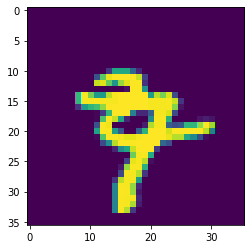

tensor(2)
tensor(7)


In [145]:
#id1,id2,p1,p2
def mm_clamp(mmn_idx):
    base  = T.Pad(padding=p1[mmn_idx])(ds_train[id1[mmn_idx]][0])
    top   = T.Pad(padding=p2[mmn_idx])(ds_train[id2[mmn_idx]][0])
    merge = torch.clamp(base + top, min=0, max=1)
    return merge

mmn_idx =109910
a = mm_clamp(mmn_idx)
plt.imshow(a.permute(1,2,0).numpy())
plt.show()

print(labels[id1[mmn_idx]])
print(labels[id2[mmn_idx]])

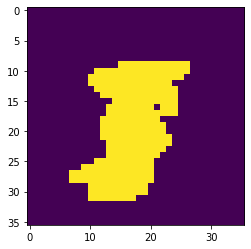

In [124]:
# !!!! nicht so sonst error!!!


#id1,id2,p1,p2
def mm_clamp2(mmn_idx):
    base  = T.Pad(padding=p1[mmn_idx])(images[id1[mmn_idx]])
    top   = T.Pad(padding=p2[mmn_idx])(images[id2[mmn_idx]])
    merge = torch.clamp(base + top, min=0, max=1)
    return merge


a = mm_clamp2(2)
a.shape
plt.imshow(a.numpy())

In [148]:
#images=ds_train.data
#labels=ds_train.targets

def __getitem__(mmn_idx):
    x = mm_clamp(mmn_idx)
    y = labels[id1[mmn_idx]]
    z = labels[id2[mmn_idx]]
    """
    if self.transform is not None:
        x = self.transform(x)
        
    if self.target_transform is not None:
        y = self.target_transform(y)
        z = self.target_transform(z)
    """
    return x, y, z

tensor(3)
tensor(1)


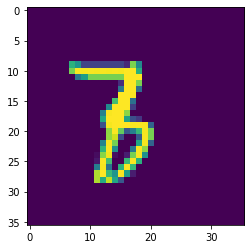

In [150]:
mmn_idx = 44157
x,y,z = __getitem__(mmn_idx)

print(y)
print(z)

plt.imshow(x.permute(1,2,0).numpy())
plt.show()

